## **Importing all the libraries**

In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import style
from collections import Counter
import pandas as pd
import seaborn as sn
import numpy  as np
from tqdm import tqdm
import os, math, copy
%matplotlib inline
tf.random.set_seed(45)
np.random.seed(45)
style.use('seaborn')

## **Loading datase and Metric**

##### Loading CIFAR10 (Canadian Institute for Advanced Research) dataset

**Note**: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Links: [[1](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10)][[2](https://www.cs.toronto.edu/~kriz/cifar.html)]

In [36]:
N_train = 3000
N_test  = 300
# (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train, Y_train = X_train[:N_train], Y_train[:N_train]
X_test, Y_test   = X_test[:N_test], Y_test[:N_test]
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(3000, 28, 28) (3000,)
(300, 28, 28) (300,)


##What's in the dataset?

In [37]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
labels = np.arange(0,10, dtype = int)
# print(labels)

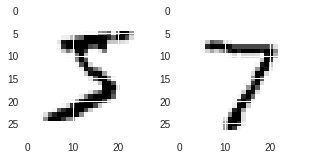

In [42]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
# curr_img = np.reshape(X_train[0], (32,32,3))
curr_img = np.reshape(X_train[0], (28,28))
plt.imshow(curr_img)
# print(plt.title("(Label: " + str(label_dict[Y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
# curr_img = np.reshape(X_test[0],(32,32,3))
curr_img = np.reshape(X_test[0],(28,28))
plt.imshow(curr_img)
# print(plt.title("(Label: " + str(label_dict[Y_test[0][0]]) + ")"))

#### Principal Component Analysis (PCA)

In [69]:
class PCA:
    def __init__(self, x):
        self.principal_axis = None
        self.mean           = np.mean(x, axis=0)
    
    def fit(self, x, n_components=2):
        # Step 1: 0-centered mean
        

        # Step 2: Calculate covarience
        # cov(x_j, x_j') = (1/m) (x_j)^T . x_j'
        

        # Step 3: Calculae eigenvalue and eigenvector.
        # For this you can use np.linalg.eigh(), preffered over .eig()
        # eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # Step 4: Sort the eigenvalues in descending order, place eigenvector according to it.
        

        # Step 5: Select the number of principal components for data reduction
        
        components = []

        # set the pricipal components
        self.principal_axis = []

    def transform(self, x):
        x = x - self.mean

        # Step 6: Project the data onto principal components

        # set the projected data

        # return projected_data
        return 

In [48]:
# Here we are reshaping the Nx32x32x3 dimenision to Nx3072
# why reshaping? [think]
pca_x_train = np.reshape(X_train, [X_train.shape[0], -1])
pca_x_test  = np.reshape(X_test, [X_test.shape[0], -1])

In [49]:
print("Before rehsaping: {}, {}".format(X_train.shape, X_test.shape))
print("After rehsaping: {}, {}".format(pca_x_train.shape, pca_x_test.shape))

Before rehsaping: (3000, 28, 28), (300, 28, 28)
After rehsaping: (3000, 784), (300, 784)


In [55]:
# Creating object of PCA and training the PCA for better component selection
pca = PCA(pca_x_train)
pca.fit(pca_x_train, n_components=10)

In [9]:
# Here we have to transform the train and test data
pca_x_train_pc = pca.transform(pca_x_train)
pca_x_test_pc  = pca.transform(pca_x_test)

In [10]:
print("Shape after applying PCA: {}, {}".format(pca_x_train_pc.shape, pca_x_test_pc.shape))

Shape after applying PCA: (3000, 10), (300, 10)


## Using SKLearn

In [58]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(pca_x_train) # normalizing the features
pca_x_train_std = ss.transform(pca_x_train) # normalizing the features
pca_x_test_std = ss.transform(pca_x_test) # normalizing the features

In [59]:
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=10)

pca_sklearn.fit(pca_x_train_std)
pca_x_train_pc_sklearn = pca_sklearn.transform(pca_x_train_std)
pca_x_test_pc_sklearn = pca_sklearn.transform(pca_x_test_std)

In [60]:
print("Shape after applying PCA: {}, {}".format(pca_x_train_pc_sklearn.shape, pca_x_test_pc_sklearn.shape))

Shape after applying PCA: (3000, 10), (300, 10)


In [64]:
def plot_pc(pca_x, Y):
  plt.figure(figsize=(8,8), dpi=150)
  # cmap = cm.get_cmap('jet', 10)
  plt.scatter(x=pca_x[:,0],y=pca_x[:,1],c=Y,s=35,cmap='jet')
  # plt.title("First two principal components of the cifar10 dataset")
  plt.title("First two principal components of the MNIST dataset")
  plt.colorbar()
  plt.show()

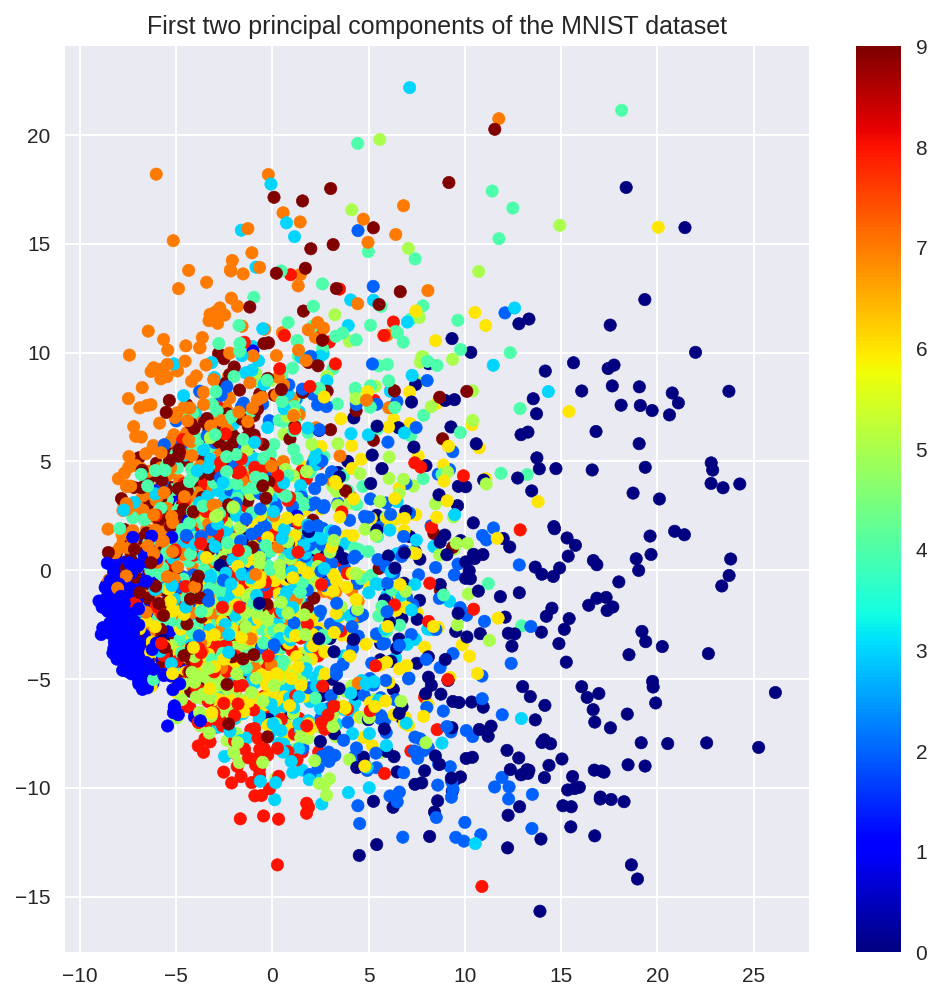

In [65]:
plot_pc(pca_x_train_pc_sklearn, Y_train)

In [68]:
def plot_tsne(x_pca,y_pca):
  model_tsne = TSNE(n_components = 2, perplexity = 50)
  tsne = model_tsne.fit_transform(x_pca)
  plt.figure(figsize=(8,8), dpi=150)
  # cmap = cm.get_cmap('jet', 10)
  plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_pca,s=35,cmap='jet')
  plt.title("t-sne for 2 components of the mnist dataset")
  plt.colorbar()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


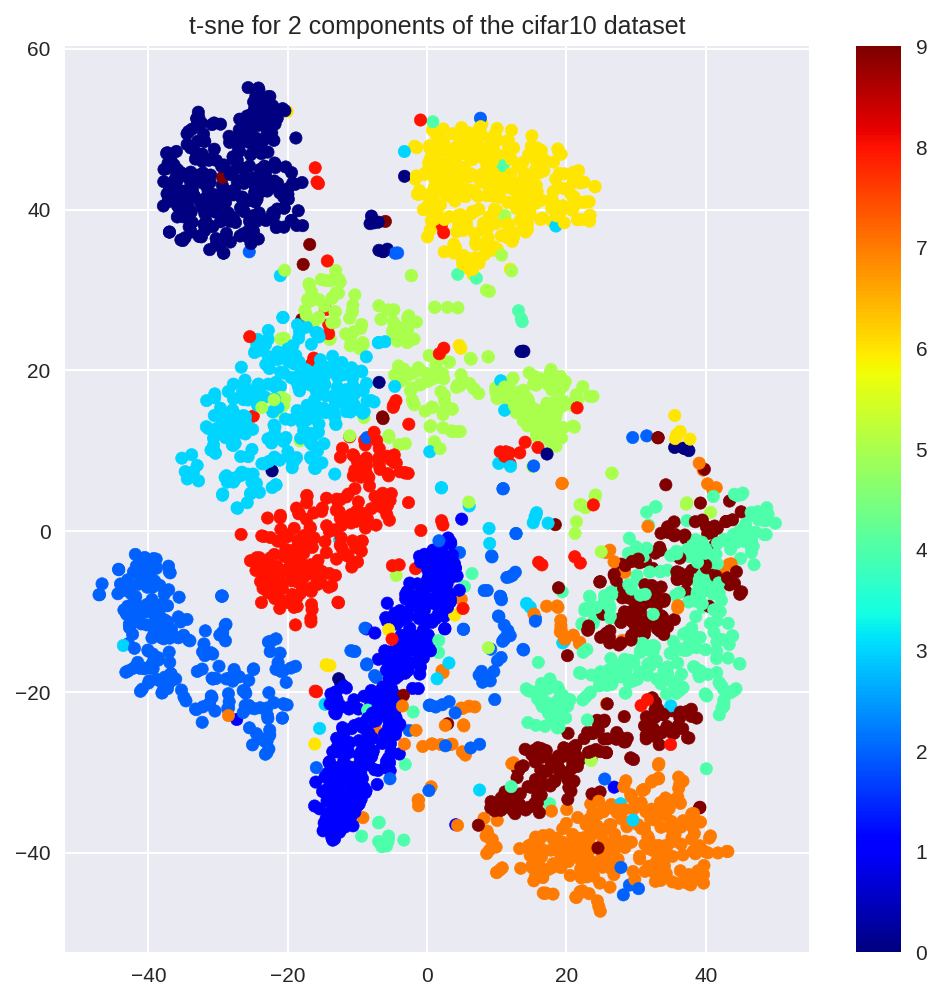

In [67]:
plot_tsne(pca_x_train, Y_train)